This code is my assignment 1 for my machine learning module at UCL 2017/18. For this assignment I received 100% mark.

# Least Squares  Polynomial Fitting

## Introduction

As discussed during Week 2, one can use linear regression to fit a nonlinear function to data by employing a nonlinear embedding function $\phi: \Re^D \rightarrow \Re^K$. One can then express a nonlinear function  in terms of an inner product 
as follows:
$$f(\mathbf{x}) = \langle \mathbf{w}, \phi(\mathbf{x})\rangle $$

In this assignment we will consider the case of an embedding function that takes a point $x\in R$ to a $K$-dimensional space using the following expression:

$$\phi_K(x) = \left[\begin{array}{c}1 \\ x \\ x^2 \\ \vdots\\ x^K \end{array}\right]$$

We will be treating $K$ as a hyper-parameter, i.e. we will not try to estimate $K$, but will rather explore the effect of changing its values. 

Using this embedding function allows us to express a $K$-th order polynomial in terms of an inner product:

$$ f_K(x) =  \langle \mathbf{w}^T_K \phi_K(x)\rangle = w_0 + w_1 x + w_2 x^2 + \ldots + x_K x^K $$


If the quality of the approximation on a set of points is measured in terms of the quadratic loss:
\begin{equation}
E(f,\mathcal{S}) = \sum_i (y_i - f_K(x_i))^2
\end{equation}
we can then find the optimal parameters $\mathbf{w}_K$ of $f_K$ using the least squares formula derived in class.


## Import test and training data from 1Ddata.mat

In [1]:
# Import all necessary module. If you get an error when executing
# this cell, then you are probably missing a module

import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
 
#x_train = spio.loadmat('1Ddata.mat', squeeze_me=True)['x_train']
#x_test = spio.loadmat('1Ddata.mat', squeeze_me=True)['x_test']
#y_train = spio.loadmat('1Ddata.mat', squeeze_me=True)['y_train']
#y_test = spio.loadmat('1Ddata.mat', squeeze_me=True)['y_test']

with open('data_pol_fit.pkl', 'rb') as handle:
        data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T


### Visualise the data

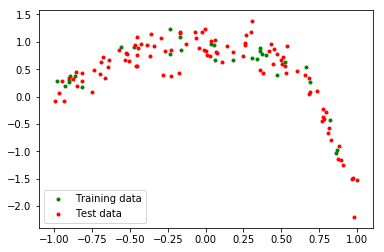

In [3]:
plt.figure()
plt.scatter(x_train,y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test,y_test, c='r', marker='.', label="Test data")
plt.legend()
plt.show()

## Define function poly 
Poly should take a vector value x and a K+1 dimensional vector w as arguments and return the value of the K-th order polynomial: 
$$ f_K(x) =  \langle \mathbf{w}^T_K \phi_K(x)\rangle = w_0 + w_1 x + w_2 x^2 + \ldots + x_K x^K $$

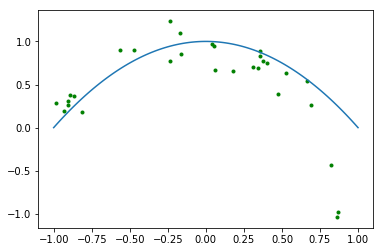

In [4]:
def poly(x, weight):    
    y = 0
    for i, value in enumerate(weight):
        y += (value)*(x**i)
    return y
    
# test if the function is correct
w=[1,0,-1]
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)
plt.figure()
plt.plot(x,y)
plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()
    
    



## Define embedding function

Now we need to define an embedding function that takes a point (or a vector of points) $x\in R$ to a $K$-dimensional space using the following expression:

$$\phi_K(x) = \left[\begin{array}{c}1 & x & x^2 & \dots & x^K \end{array}\right]$$

K should be an argument to the function. Keep in mind that we should also be able to apply the function to vectors. That means, if we have N data samples $x_1,x_2,\dots,x_N$ and feed vector $\vec{x}=[x_1,x_2,\dots,x_N]^T$ to the function then the output should be the following array: 


$$\phi_K(\vec{x}) = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \dots & x_1^K \\
1 & x_2 & x_2^2 & \dots & x_2^K \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^K  
\end{array}\right]$$



 


In [5]:
# x should be a scalar or a vector of dimensions [n, 1]
def embedding_func(x,K):
    F = np.zeros([len(x), K+1], dtype=np.float32)
    for idx, j in enumerate(x):
        for i in range (K+1):
            F[idx, i] = (j**i)
    return F

## if the function is correct, following should print [1 2 4 8 16; 1 3 9 27 81]
x = np.array([2, 3])  

print(embedding_func(x,4))
        
    

[[  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]]


# Define function that fits K-th order polynomial and returns parameter w 

Input arguments for the function are [Nx1] vector y and [Nx1] vector x. Hint: In python 3.6 you can write A@B to do matrix multiplication instead of np.matmul(A,B).

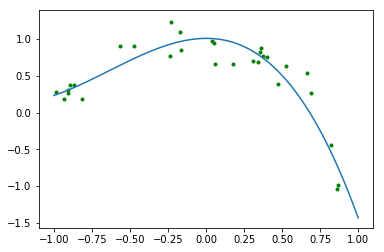

In [6]:
def estimate_w(y, X, K):
    x_new = embedding_func(X, K)
    w = np.linalg.inv(x_new.T @ x_new) @ x_new.T @ y

    return w
    

w = estimate_w(y_train,x_train,3)
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
y = poly(x, w)
plt.figure()
plt.plot(x,y)

plt.scatter(x_train,y_train, c='g', marker='.', label="Train data")
plt.show()



# Fit 0-th to 10-th order polynomials to training data and plot resulting functions 




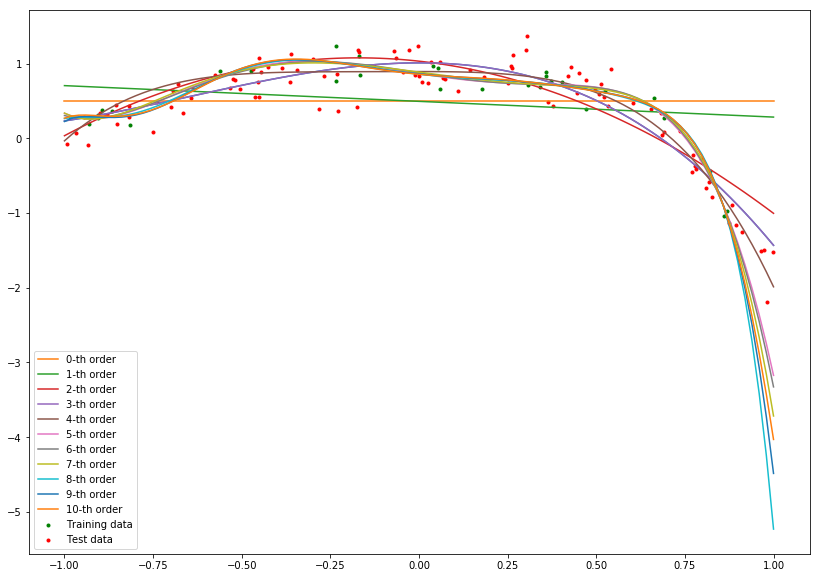

In [7]:
max_poly = 10

weights_store = list()

plt.figure(figsize=(14,10))
plt.plot(x,y)
x = np.linspace(-1.0,1.0, num=100, endpoint=True)
plt.scatter(x_train,y_train, c='g', marker='.', label="Training data")
plt.scatter(x_test,y_test, c='r', marker='.', label="Test data")


for poly_degree in range(0, max_poly+1):
    w = estimate_w(y_train,x_train, poly_degree)
    y = poly(x, w)
    plt.plot(x,y, label = (str(poly_degree ) + "-th order"))
    
    
plt.legend()
plt.show()



# Training and Testing Error

Calculate the training and the testing error given: 
\begin{equation}
E(f,\mathcal{S}) = \sum_i (y_i - f_K(x_i))^2
\end{equation}

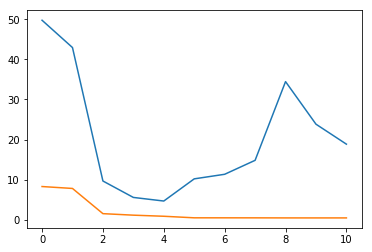

In [8]:

error_train = np.zeros(shape=(max_poly+1))
error_test  = np.zeros(shape=(max_poly+1))

for poly_degree in range(max_poly+1):

    for idx,value in enumerate(x_train):
        train_value = poly(value,estimate_w(y_train,x_train,poly_degree))
        error_train[poly_degree] += (y_train[idx] - train_value) ** 2

    for idx,value in enumerate(x_test):
        test_value = poly(value,estimate_w(y_train,x_train,poly_degree))
        error_test[poly_degree] += (y_test[idx] - test_value) ** 2
    
    
plt.figure()
plt.plot(error_test, label="Testing error")
plt.plot(error_train, label="Training error")
plt.show()


# 2. Linear versus logistic regression
The  file {week_1} contains code to compare the robustness of linear and logistic regression.
Linear regression has already been implemented for you. Please go through the relevant part of the code, and the relevant comments, before advancing to the remainder. 



As discussed in class, the loss function (or, criterion, $L$) driving logistic regression equals:

\begin{eqnarray}
L(\mathbf{w}) = -\sum_{i=1}^{N}\left[ y^i \log\left(g\left(\left<\mathbf{x}^i,\mathbf{w}\right>\right)\right)  + (1-y^i) \log\left(1-g\left(\left<\mathbf{x}^i,\mathbf{w}\right>\right)\right)\right].
\end{eqnarray}

Maximize this criterion for the provided dataset. Making reference to the slides of Week 3, this requires computing first and second order differentials, corresponding to $\nabla L(\mathbf{w})$ and $\nabla^2 L(\mathbf{w})$, respectively. 



1.  (.2/.7) Write the code to compute $\nabla L(\mathbf{w})$ and $\nabla^2 L(\mathbf{w})$. 

2. (.2/.7) Use these  to implement the Newton-Raphson algorithm.  Consider that convergence is achieved when $|w^{t} - w^{t-1}|_2<.001 |w^t|_2$

3. (.2/.7) Plot the loss function, $L(w)$, of Eq. 1 as a function of Newton-Raphson iteration.

4. (.1/.7) Compare the robustness of the fitted boundaries for the two experiments.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data generation and visualization

In [10]:
def evaluate_linear_discriminant_on_grid(w_linear,loc_x,loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    [sz_m,sz_n] = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

In [11]:
# Load the dataset
# Load the file data_lin_vs_log.pkl

with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)
    
#data = scipy.io.loadmat('data.mat')  # Load MATLAB file.
test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

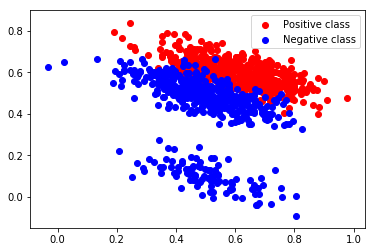

In [12]:
#display your data
pos=np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]
plt.scatter(train_features[0,pos],train_features[1,pos],c="r",label="Positive class")
plt.scatter(train_features[0,neg],train_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()

## Linear Regression

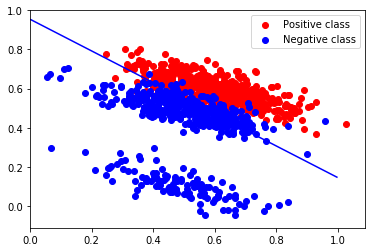

In [13]:
## Train a linear classifier

## in slide 31, Lecture 1, X was (Ndata x Ndimensions), Y was (Ndata x 1)
## Now the size of train_features is Ndimensions x Ndata and of Y is 1 x Ndata
## so we transpose train_features and train_data to get X and Y respectively
X = train_features.T;
Y = train_labels.T;

##  form X^T X
XX = np.dot(X.T, X)

##  form X^T Y
YX = np.dot(X.T,Y);

##  solve   w  = (X^T X)^{-1}  (X^T Y)
w = np.dot(np.linalg.inv(XX),YX);


## visualize classifier
## step 1: get its value over a regular grid of positions
loc_x = np.arange(0,1.01,.01)
loc_y = np.arange(0,1.01,.01)
function_values,grid_x,grid_y = evaluate_linear_discriminant_on_grid(w,loc_x,loc_y)

## step 2: plot the set of positions where its value equals .5
contour_values = [.5,];
contPlt = plt.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
#plt.clabel(contPlt)

## step 3: superimpose the points of the test set
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

plt.scatter(test_features[0,pos],test_features[1,pos],c="r",label="Positive class")
plt.scatter(test_features[0,neg],test_features[1,neg],c="b",label="Negative class")
plt.legend(loc=1)
plt.show()

## Logistic regression

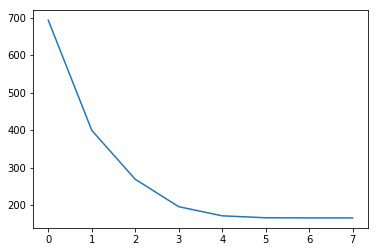

In [14]:
def g(x):
    return (1/(1+np.exp(-x)))

def calc_first_derivative(w):
    first_derivative = -sum(np.dot((Y - g(np.dot(X,w))).T,X))
    return first_derivative.reshape(3,1)

def calc_second_derivative(w):
    R = np.diag((g(np.dot(X,w))*(1-g(np.dot(X,w)))).flatten())
    return X.T @ R @ X

def loss_function(w):
    loss = -sum( Y*np.log(g(np.dot(X,w)))+(1-Y)*np.log(1-g(np.dot(X,w))))
    return loss

weight = np.array([[0], [0], [0]]) #initialize w 
loss = []

new_w = 1000 # used to allow the while loop to run without breaking before it begins

while np.linalg.norm(weight-new_w) > 0.001*np.linalg.norm(weight):
    loss.append(loss_function(weight))
    new_w = weight
    weight = weight - (np.linalg.inv(calc_second_derivative(weight)) @ calc_first_derivative(weight))
    

plt.plot(loss)
plt.show()


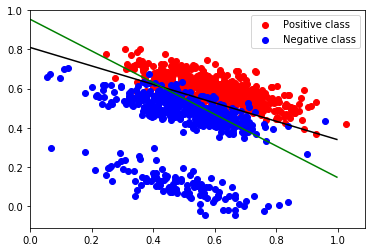

In [15]:
log_score, meshgrid_x, meshgrid_y = evaluate_linear_discriminant_on_grid(weight,loc_x,loc_y)
function_values,grid_x,grid_y = evaluate_linear_discriminant_on_grid(w,loc_x,loc_y)

contour_values = [0.5,];
contPlt = plt.contour(meshgrid_x,meshgrid_y,log_score,contour_values,colors = ("k"))
contPlt2 = plt.contour(grid_x, grid_y, function_values, contour_values, colors = ("g"))
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

plt.scatter(test_features[0,pos],test_features[1,pos],c="r",label="Positive class")
plt.scatter(test_features[0,neg],test_features[1,neg],c="blue",label="Negative class")
plt.legend(loc=1)
plt.show()



It is clear from the plot below that the logistic regression (black line) classifies more of the points correctly than the linear regression(green line). The logistic regression line clearly defines the decision boundary more clearly where only outliers are misdefined. This is due to the fact that linear regression penalises the points further from the line more than the logistic regression. This can be seen in the way that the linear regression has a steeper gradient, this is due to the negative class having a large number of points a long way from the decision line which have a larger impact on the linear regression than the logistic regression. 